Today’s Assignments

Complete Unit 2 - “Agent Tools & Interoperability with Model Context Protocol (MCP)”:

- Listen to the summary podcast episode for this unit (https://www.youtube.com/watch?v=Cr4NA6rxHAM), created by NotebookLM.
- To complement the podcast, read the “Agent Tools & Interoperability with MCP” whitepaper (https://www.kaggle.com/whitepaper-agent-tools-and-interoperability-with-mcp)
- Complete these codelabs on Kaggle:
- Explore new ways to add tools to extend what your agents can do - (https://www.kaggle.com/code/kaggle5daysofai/day-2a-agent-tools).
- Explore best practices for tools, including using MCP and long-running operations (https://www.kaggle.com/code/kaggle5daysofai/day-2b-agent-tools-best-practices).
- We also have a troubleshooting guide for the codelabs. Be sure to check there for solutions to common problems - https://www.kaggle.com/code/kaggle5daysofai/day-0-troubleshooting-and-faqs
- want to have an interactive conversation (https://support.google.com/notebooklm) Try adding the whitepapers to NotebookLM (https://notebooklm.google.com/).

Reminders and Announcements:

- Find the complete list of scheduled livestreams and past recordings here (https://www.youtube.com/playlist?list=PLqFaTIg4myu9r7uRoNfbJhHUbLp-1t1YE).
- Tomorrow’s livestream (https://www.youtube.com/live/8Gk1BE3uYek) will be hosted by Kanchana Patlolla and Anant Nawalgaria at 11 AM PT / 8 PM CET / 12:30 AM IST (next day). They will be joined by codelabs author Laxmi Harikumar (https://www.linkedin.com/in/laxmi-harikumar/), along with other guests from Google, Edward Grefenstette, Mike Styer and Oriol Vinyals, and external speaker, Alex Wisner-Gross from Reified (https://reifiedllc.com/) to discuss the assignments and share insights.
- As a reminder, you do not need to submit the assignments. You can complete them at your own pace.
- This course page (https://www.kaggle.com/learn-guide/5-day-agents) serves as the central hub for all event resources, including assignments and important updates.
- Be sure to ask all your questions about the podcast, readings and codelabs in the ⁠5dgai-question-forum channel, where other participants and Googlers are ready to help. Questions selected from -Discord for discussion during the livestream will be chosen for Kaggle swag!

In [10]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="D:\Learning\.env")
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
if api_key:
    print("Google API key found and loaded successfully!")
else:
    print("Google API key not found.")

Google API key found and loaded successfully!


In [1]:
from google.genai import types
from google.adk.agents import LlmAgent
from google.adk.models.google_llm import Gemini
from google.adk.runners import InMemoryRunner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search, AgentTool, ToolContext
from google.adk.code_executors import BuiltInCodeExecutor

print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


In [3]:
def show_python_code_and_result(response):
    for i in range(len(response)):
        # Check if the response contains a valid function call result from the code executor
        if (
            (response[i].content.parts)
            and (response[i].content.parts[0])
            and (response[i].content.parts[0].function_response)
            and (response[i].content.parts[0].function_response.response)
        ):
            response_code = response[i].content.parts[0].function_response.response
            if "result" in response_code and response_code["result"] != "```":
                if "tool_code" in response_code["result"]:
                    print(
                        "Generated Python Code >> ",
                        response_code["result"].replace("tool_code", ""),
                    )
                else:
                    print("Generated Python Response >> ", response_code["result"])


print("✅ Helper functions defined.")

✅ Helper functions defined.


In [4]:
retry_config = types.HttpRetryOptions(
    attempts=5,  # Maximum retry attempts
    exp_base=7,  # Delay multiplier
    initial_delay=1,
    http_status_codes=[429, 500, 503, 504],  # Retry on these HTTP errors
)

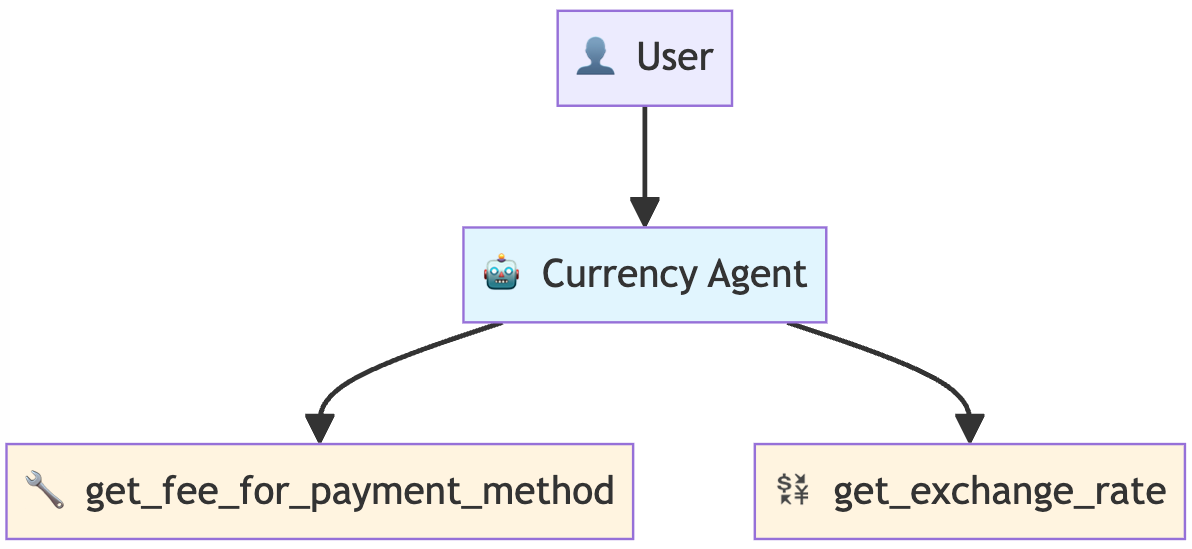

In [11]:
# Pay attention to the docstring, type hints, and return value.
def get_fee_for_payment_method(method: str) -> dict:
    """Looks up the transaction fee percentage for a given payment method.

    This tool simulates looking up a company's internal fee structure based on
    the name of the payment method provided by the user.

    Args:
        method: The name of the payment method. It should be descriptive,
                e.g., "platinum credit card" or "bank transfer".

    Returns:
        Dictionary with status and fee information.
        Success: {"status": "success", "fee_percentage": 0.02}
        Error: {"status": "error", "error_message": "Payment method not found"}
    """
    # This simulates looking up a company's internal fee structure.
    fee_database = {
        "platinum credit card": 0.02,  # 2%
        "gold debit card": 0.035,  # 3.5%
        "bank transfer": 0.01,  # 1%
    }

    fee = fee_database.get(method.lower())
    if fee is not None:
        return {"status": "success", "fee_percentage": fee}
    else:
        return {
            "status": "error",
            "error_message": f"Payment method '{method}' not found",
        }


print("✅ Fee lookup function created")
print(f"💳 Test: {get_fee_for_payment_method('gold debit card')}")

✅ Fee lookup function created
💳 Test: {'status': 'success', 'fee_percentage': 0.035}


In [6]:
def get_exchange_rate(base_currency: str, target_currency: str) -> dict:
    """Looks up and returns the exchange rate between two currencies.

    Args:
        base_currency: The ISO 4217 currency code of the currency you
                       are converting from (e.g., "USD").
        target_currency: The ISO 4217 currency code of the currency you
                         are converting to (e.g., "EUR").

    Returns:
        Dictionary with status and rate information.
        Success: {"status": "success", "rate": 0.93}
        Error: {"status": "error", "error_message": "Unsupported currency pair"}
    """

    # Static data simulating a live exchange rate API
    # In production, this would call something like: requests.get("api.exchangerates.com")
    rate_database = {
        "usd": {
            "eur": 0.93,  # Euro
            "jpy": 157.50,  # Japanese Yen
            "inr": 83.58,  # Indian Rupee
        }
    }

    # Input validation and processing
    base = base_currency.lower()
    target = target_currency.lower()

    # Return structured result with status
    rate = rate_database.get(base, {}).get(target)
    if rate is not None:
        return {"status": "success", "rate": rate}
    else:
        return {
            "status": "error",
            "error_message": f"Unsupported currency pair: {base_currency}/{target_currency}",
        }


print("✅ Exchange rate function created")
print(f"💱 Test: {get_exchange_rate('USD', 'EUR')}")

✅ Exchange rate function created
💱 Test: {'status': 'success', 'rate': 0.93}


In [7]:
# Currency agent with custom function tools
currency_agent = LlmAgent(
    name="currency_agent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    instruction="""You are a smart currency conversion assistant.

    For currency conversion requests:
    1. Use `get_fee_for_payment_method()` to find transaction fees
    2. Use `get_exchange_rate()` to get currency conversion rates
    3. Check the "status" field in each tool's response for errors
    4. Calculate the final amount after fees based on the output from `get_fee_for_payment_method` and `get_exchange_rate` methods and provide a clear breakdown.
    5. First, state the final converted amount.
        Then, explain how you got that result by showing the intermediate amounts. Your explanation must include: the fee percentage and its
        value in the original currency, the amount remaining after the fee, and the exchange rate used for the final conversion.

    If any tool returns status "error", explain the issue to the user clearly.
    """,
    tools=[get_fee_for_payment_method, get_exchange_rate],
)

print("✅ Currency agent created with custom function tools")
print("🔧 Available tools:")
print("  • get_fee_for_payment_method - Looks up company fee structure")
print("  • get_exchange_rate - Gets current exchange rates")

✅ Currency agent created with custom function tools
🔧 Available tools:
  • get_fee_for_payment_method - Looks up company fee structure
  • get_exchange_rate - Gets current exchange rates


In [8]:
# Test the currency agent
currency_runner = InMemoryRunner(agent=currency_agent)
_ = await currency_runner.run_debug(
    "I want to convert 500 US Dollars to Euros using my Platinum Credit Card. How much will I receive?"
)


 ### Created new session: debug_session_id

User > I want to convert 500 US Dollars to Euros using my Platinum Credit Card. How much will I receive?


currency_agent > You will receive 455.70 Euros.

Here's the breakdown:

*   **Fee:** A 2.00% fee will be charged for using your Platinum Credit Card, which amounts to 10.00 USD.
*   **Amount after fee:** This leaves you with 490.00 USD to convert.
*   **Exchange rate:** Using the current exchange rate of 0.93, your 490.00 USD is converted to 455.70 EUR.


In [9]:
currency_runner = InMemoryRunner(agent=currency_agent)
_ = await currency_runner.run_debug(
    "I want to convert 500 US Dollars to Jpy using my Platinum Credit Card. How much will I receive?"
)


 ### Created new session: debug_session_id

User > I want to convert 500 US Dollars to Jpy using my Platinum Credit Card. How much will I receive?


currency_agent > The final converted amount is 7717.5 JPY.

Here's how this amount was calculated:

1.  **Fee Calculation:** A fee of 0.02 (2%) was applied to the initial 500 USD. This amounts to 10 USD.
2.  **Amount After Fee:** After deducting the fee, 490 USD remained.
3.  **Currency Conversion:** The remaining 490 USD was converted to JPY using an exchange rate of 157.5 JPY per USD, resulting in 7717.5 JPY.


In [10]:
currency_runner = InMemoryRunner(agent=currency_agent)
_ = await currency_runner.run_debug(
    "I have a gold debit card. I want to convert 500 US Dollars to Euros using my Platinum Credit Card. How much will I receive?"
)


 ### Created new session: debug_session_id

User > I have a gold debit card. I want to convert 500 US Dollars to Euros using my Platinum Credit Card. How much will I receive?


currency_agent > I have a gold debit card, but I will use my Platinum Credit Card to convert currencies. You will receive €455.75.

Here's how this amount was calculated:

1. **Fee**: A fee of 2% will be charged for using your Platinum Credit Card. This amounts to $10.00 USD.
2. **Remaining Amount**: After deducting the fee, you will have $490.00 USD remaining.
3. **Conversion**: With the exchange rate of 1 USD = 0.93 EUR, $490.00 USD is converted to €455.70 EUR.


In [12]:
currency_runner = InMemoryRunner(agent=currency_agent)
_ = await currency_runner.run_debug(
    "I have a gold debit card. I want to convert 500 US Dollars to Euros. How much will I receive?"
)


 ### Created new session: debug_session_id

User > I have a gold debit card. I want to convert 500 US Dollars to Euros. How much will I receive?


currency_agent > I will receive 465.33 Euros.

Here's how this was calculated:
The fee for using a gold debit card is 3.5%, which is 17.50 USD. This leaves you with 482.50 USD to convert.
The exchange rate from USD to EUR is 0.93.
So, the final converted amount is 482.50 USD * 0.93 = 448.73 EUR.

Summary:
Fee: 17.50 USD
Amount to convert: 482.50 USD
Exchange rate: 0.93
Final Amount: 448.73 EUR


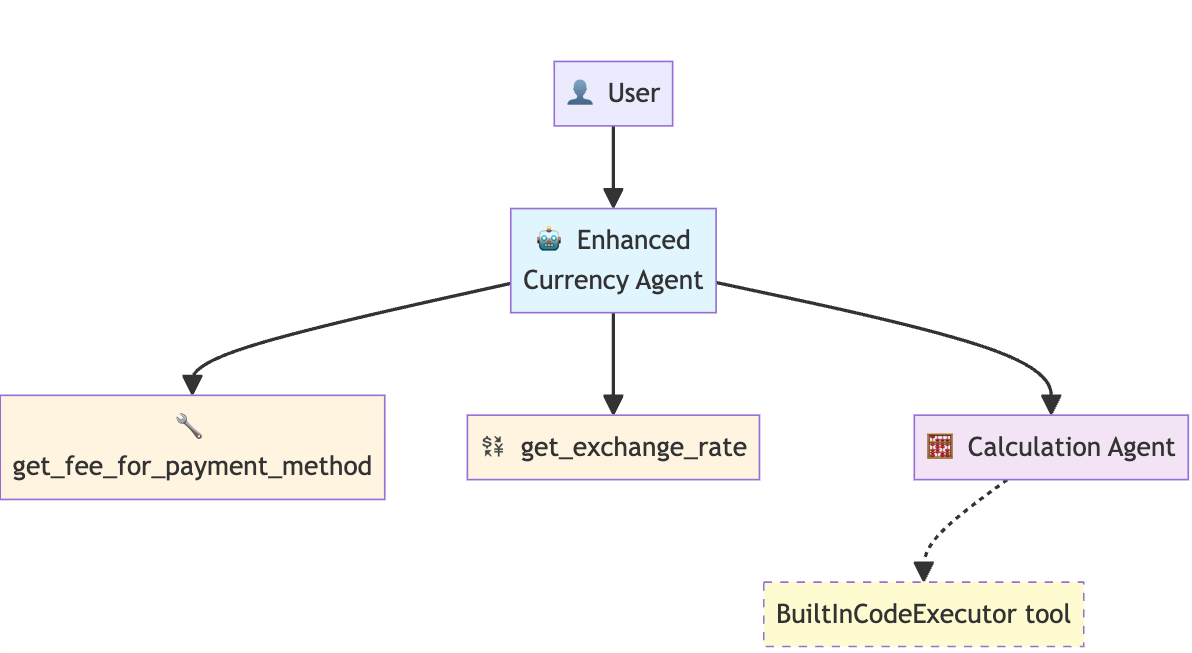

In [13]:
calculation_agent = LlmAgent(
    name="CalculationAgent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    instruction="""You are a specialized calculator that ONLY responds with Python code. You are forbidden from providing any text, explanations, or conversational responses.
 
     Your task is to take a request for a calculation and translate it into a single block of Python code that calculates the answer.
     
     **RULES:**
    1.  Your output MUST be ONLY a Python code block.
    2.  Do NOT write any text before or after the code block.
    3.  The Python code MUST calculate the result.
    4.  The Python code MUST print the final result to stdout.
    5.  You are PROHIBITED from performing the calculation yourself. Your only job is to generate the code that will perform the calculation.
   
    Failure to follow these rules will result in an error.
       """,
    code_executor=BuiltInCodeExecutor(),  # Use the built-in Code Executor Tool. This gives the agent code execution capabilities
)

In [14]:
enhanced_currency_agent = LlmAgent(
    name="enhanced_currency_agent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    # Updated instruction
    instruction="""You are a smart currency conversion assistant. You must strictly follow these steps and use the available tools.

  For any currency conversion request:

   1. Get Transaction Fee: Use the get_fee_for_payment_method() tool to determine the transaction fee.
   2. Get Exchange Rate: Use the get_exchange_rate() tool to get the currency conversion rate.
   3. Error Check: After each tool call, you must check the "status" field in the response. If the status is "error", you must stop and clearly explain the issue to the user.
   4. Calculate Final Amount (CRITICAL): You are strictly prohibited from performing any arithmetic calculations yourself. You must use the calculation_agent tool to generate Python code that calculates the final converted amount. This 
      code will use the fee information from step 1 and the exchange rate from step 2.
   5. Provide Detailed Breakdown: In your summary, you must:
       * State the final converted amount.
       * Explain how the result was calculated, including:
           * The fee percentage and the fee amount in the original currency.
           * The amount remaining after deducting the fee.
           * The exchange rate applied.
    """,
    tools=[
        get_fee_for_payment_method,
        get_exchange_rate,
        AgentTool(agent=calculation_agent),  # Using another agent as a tool!
    ],
)

print("✅ Enhanced currency agent created")
print("🎯 New capability: Delegates calculations to specialist agent")
print("🔧 Tool types used:")
print("  • Function Tools (fees, rates)")
print("  • Agent Tool (calculation specialist)")

✅ Enhanced currency agent created
🎯 New capability: Delegates calculations to specialist agent
🔧 Tool types used:
  • Function Tools (fees, rates)
  • Agent Tool (calculation specialist)


In [15]:
# Define a runner
enhanced_runner = InMemoryRunner(agent=enhanced_currency_agent)

In [16]:
response = await enhanced_runner.run_debug(
    "Convert 1,250 USD to INR using a Bank Transfer. Show me the precise calculation."
)


 ### Created new session: debug_session_id

User > Convert 1,250 USD to INR using a Bank Transfer. Show me the precise calculation.


enhanced_currency_agent > The final converted amount is 103659.3.

Here's the breakdown of the calculation:
The fee percentage for a Bank Transfer is 1%, which amounts to 12.5 USD.
After deducting the fee, the amount remaining is 1237.5 USD.
This amount was then converted to INR using an exchange rate of 83.58, resulting in 103659.3 INR.


In [17]:
response = await enhanced_runner.run_debug(
    "i have a gold debit card. Convert 1,250 USD to INR and convert 1200 used to JPY using my Platinum Credit Card. Show me the precise calculation."
)


 ### Continue session: debug_session_id

User > i have a gold debit card. Convert 1,250 USD to INR and convert 1200 used to JPY using my Platinum Credit Card. Show me the precise calculation.


d:\Learning\.venv\Lib\site-packages\google\genai\_common.py:613: UserWarning: TOO_MANY_TOOL_CALLS is not a valid FinishReason
  warnings.warn(f'{value} is not a valid {cls.__name__}')


enhanced_currency_agent > **First Transaction: 1,250 USD to INR**

The final converted amount is 100818.375 INR.

Here's the breakdown of the calculation:
*   The fee percentage for a gold debit card is 3.5%, which amounts to 43.75 USD.
*   After deducting the fee, the amount remaining is 1206.25 USD.
*   This amount was then converted to INR using an exchange rate of 83.58, resulting in 100818.375 INR.

**Second Transaction: 1,200 USD to JPY**

The final converted amount is 185220.0 JPY.

Here's the breakdown of the calculation:
*   The fee percentage for a Platinum Credit Card is 2%, which amounts to 24.0 USD.
*   After deducting the fee, the amount remaining is 1176.0 USD.
*   This amount was then converted to JPY using an exchange rate of 157.5, resulting in 185220.0 JPY.


In [18]:
show_python_code_and_result(response)

Generated Python Response >>  Amount in INR: 100818.375
Fee percentage: 3.5%
Fee amount in USD: 43.75
Amount after fee in USD: 1206.25
Exchange rate: 83.58
Generated Python Response >>  Summary:
The initial request involved a series of calculations related to currency conversion and fees. The provided Python code snippet successfully calculated and printed the following values:
- Amount in JPY: 185220.0
- Fee percentage: 2.0%
- Fee amount in USD: 24.0
- Amount after fee in USD: 1176.0
- Exchange rate: 157.5

Since the request was to "Continue processing previous requests as instructed" and no new calculations or modifications were specified, and the provided output seems to be a repetition of the previous correct calculation, I am concluding the process as no further outputs are needed.



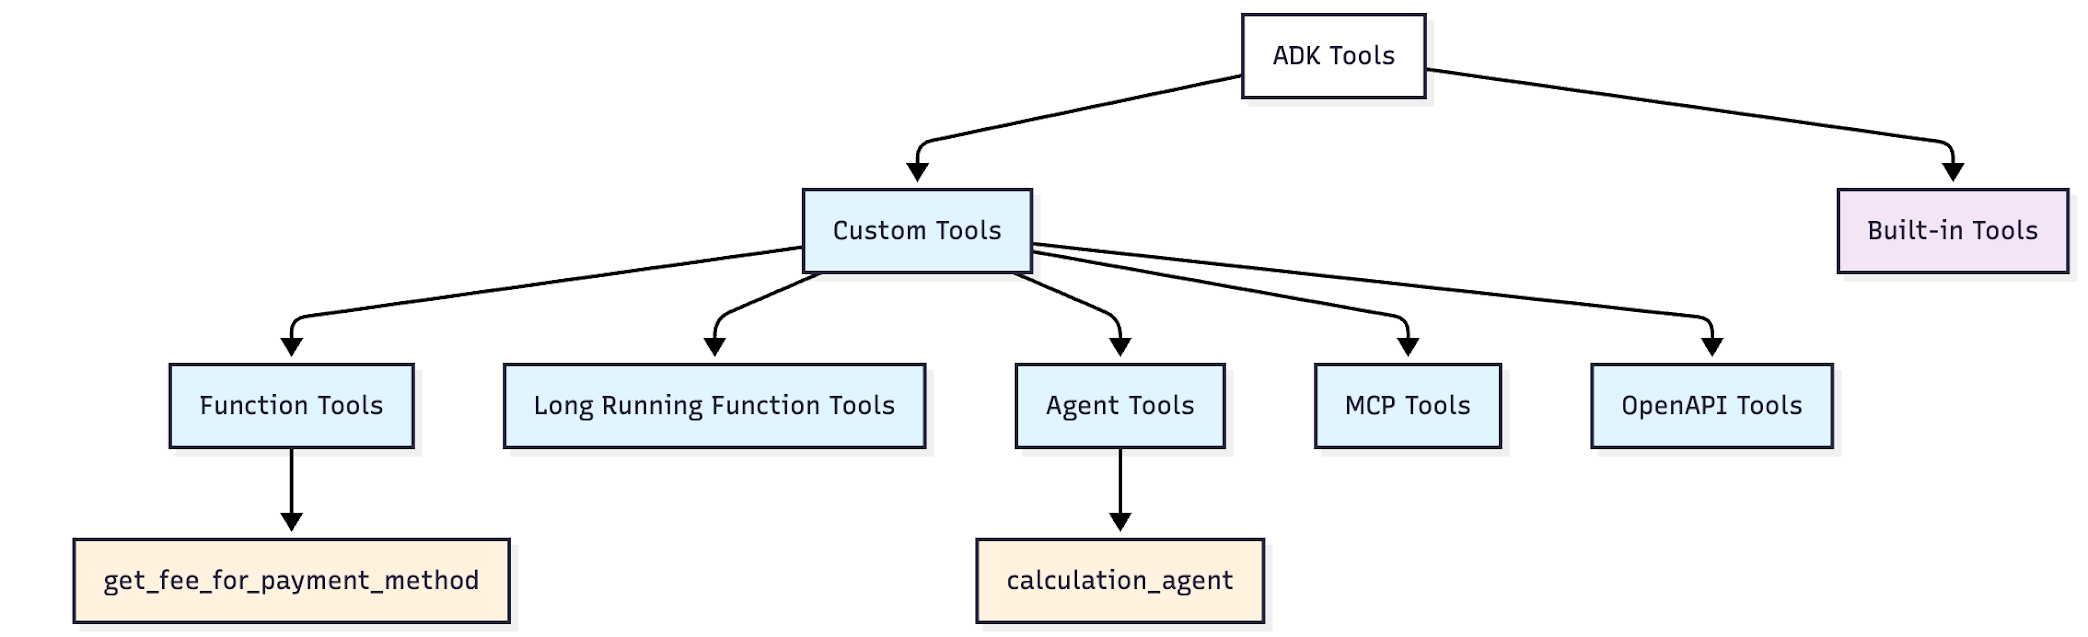

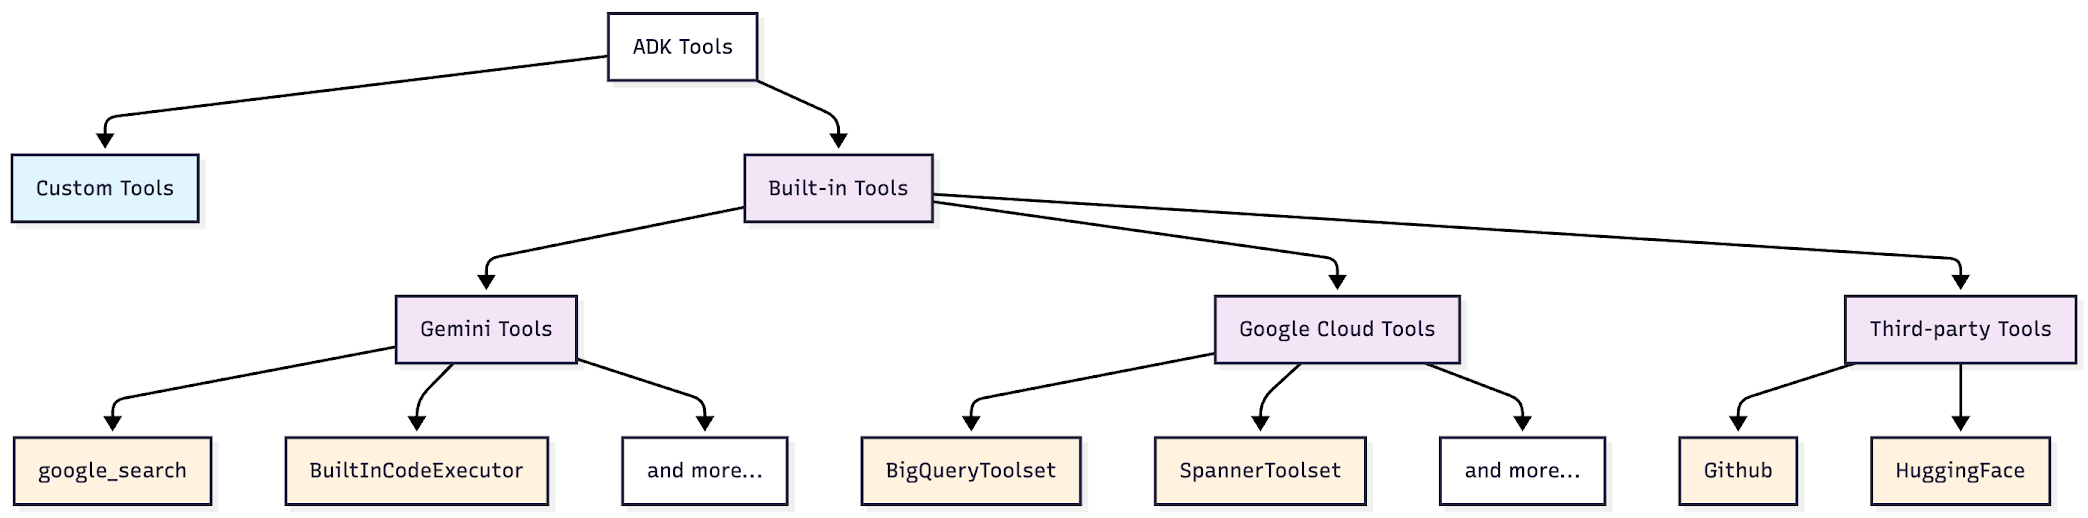